In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
from bs4 import BeautifulSoup

In [6]:
url = 'https://www1.president.go.kr/petitions/best?page=23'
path = '#cont_view > div.cs_area > div > div > div.board.text > div.b_list.category > div.bl_body > ul > li'

In [7]:
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
lis = soup.select(path)
len(lis)

15

In [11]:
lis[0]

<li>
<div class="bl_wrap">
<div class="bl_category cs"><span class="sound_only">분류 </span> 보건복지</div>
<div class="bl_subject">
<a class="cb" href="/petitions/604770?navigation=best"><span class="sound_only">제목 </span>얼마나 더 많은 국민이 죽어나가야만 하는겁니까?</a>
</div>
<span class="sound_only">청원만료 </span><div class="bl_date light">22-04-16</div>
<div class="bl_agree cb wv_agree">
<span class="sound_only">참여인원 </span>343명
												</div>
</div>
</li>

In [18]:
lis[0].select('.bl_category')[0].text.split()[1]

'보건복지'

In [30]:
main_url ='https://www1.president.go.kr'

In [32]:
full_url =  main_url + lis[0].select('a.cb')[0]['href']
full_url

'https://www1.president.go.kr/petitions/604770?navigation=best'

In [33]:
res1 = requests.get(full_url)
soup1 = BeautifulSoup(res1.text, 'html.parser')

In [35]:
pop = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > h2 > span')[0].text

'343'

In [50]:
cate = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[0].text[4:]
cate

'보건복지'

In [49]:
st_date = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[1].text[4:]
st_date

'2022-03-17'

In [47]:
ed_date = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[2].text[4:]
ed_date

'2022-04-16'

In [45]:
content = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_write > div.View_write')[0].text
content

"\n\t\t\t\t\t\t\t\t\t\t현재 코로나19 전담병원에서 자행되고 있는 부실한관리와 의료과실로,  사망하는 통계에도 집계되지 않는 주검들에 대해 철저한 진상규명을 청원합니다.  \n\r\n현재 코로나로 사망한 국민이 1만여명이 넘었습니다. \r\n이게 말이 됩니까?\r\nK방역으로 전국민이 잘 호응하여 여기까지 왔는데, 전쟁이 나도 이렇게까지 죽지는 않습니다. 이건 완전 의료체제 붕괴입니다.\r\n신속하고 정확한 의료체계를 구축하지 못하고 우왕좌왕하는 사이 국민들은 수백명씩 죽어나가고 있습니다.  \r\n저희 아버님도 이번 코로나19에 감염(요양원) 되어 전담병원으로 지정된 충북 제천 ○○요양병원 에서 입원한지 9일만에 돌아가셨습니다.  \r\n사망일 3일전부터 38.5도에 고열과 식사거부등 이상증세에도 불구하고 적절한 조치를 취하지 않았으며 \r\n위급한 상황일 때 심폐소생술도 하지않아 사망에 이르게 됬습니다. \r\n이는 명백한 주의의무 위반및 업무상 과실치사 입니다.\n\r\n아버님만 생각하면 이런 낯선 환경에서 얼마나 힘들고 고통스러웠을까요. \r\n저는 아버지의 마지막 가는 모습도 지켜내지 못한\r\n불효자 입니다.\r\n○○야 ! '나 좀 살려다오' 하는 아버지의 목소리가\r\n아직도 마음 한 구석에 박혀있습니다.\n\r\n국민 여러분! 청원에 동의해주십시요. \r\n누군가는 어둠만 보이는 긴 터널 속에서 쓸쓸한 죽음을 맞이한 우리 가족중 한 분일수 있습니다.\t\t\t\t\t\t\t\t\t"

In [77]:
petitions = {}

pop_list = []
cate_list = []
st_date_list = []
ed_date_list = []
content_list = []

url = 'https://www1.president.go.kr/petitions/best?page=5'
path = '#cont_view > div.cs_area > div > div > div.board.text > div.b_list.category > div.bl_body > ul > li'

res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
lis = soup.select(path)

main_url ='https://www1.president.go.kr'

for li in lis:
    full_url =  main_url + li.select('a.cb')[0]['href']
    res1 = requests.get(full_url)
    soup1 = BeautifulSoup(res1.text, 'html.parser')
    
    pop = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > h2 > span')[0].text
    cate = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[0].text[4:]
    st_date = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[1].text[4:]
    ed_date = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[2].text[4:]
    content = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_write > div.View_write')[0].text
    
#     print(pop)
#     print(cate)
#     print(st_date)
#     print(ed_date)
#     print(content)
    
    pop_list.append(pop)
    cate_list.append(cate)
    st_date_list.append(st_date)
    ed_date_list.append(ed_date)
    content_list.append(content)
    
    petitions['pop'] = pop_list
    petitions['cate'] = cate_list
    petitions['st_date'] = st_date_list
    petitions['ed_date'] = ed_date_list
    petitions['content'] = content_list
    
    pet_df = pd.DataFrame(petitions)

    
pet_df

""


In [75]:
petitions = {}

pop_list = []
cate_list = []
st_date_list = []
ed_date_list = []
content_list = []


for i in range(1,5):

    url = 'https://www1.president.go.kr/petitions/best?page={}'.format(i)
    print(url)
    path = '#cont_view > div.cs_area > div > div > div.board.text > div.b_list.category > div.bl_body > ul > li'

    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select(path)
    print(len(lis))

    main_url ='https://www1.president.go.kr'
    
    print(i, end=' ')

    for li in lis:
        

        full_url =  main_url + li.select('a.cb')[0]['href']
        print(full_url)
        res1 = requests.get(full_url)
        soup1 = BeautifulSoup(res1.text, 'html.parser')
        
        
        try:

            pop = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > h2 > span')[0].text
            cate = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[0].text[4:]
            st_date = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[1].text[4:]
            ed_date = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_info > ul > li')[2].text[4:]
            content = soup1.select('#cont_view > div.cs_area > div.new_contents > div > div.petitionsView_left > div > div.petitionsView_write > div.View_write')[0].text

            print(pop)
            print(cate)
            print(st_date)
            print(ed_date)
            print(content)
            print('=====')

            pop_list.append(pop)
            cate_list.append(cate)
            st_date_list.append(st_date)
            ed_date_list.append(ed_date)
            content_list.append(content)

            petitions['pop'] = pop_list
            petitions['cate'] = cate_list
            petitions['st_date'] = st_date_list
            petitions['ed_date'] = ed_date_list
            petitions['content'] = content_list
            
        except:
            pass

pet_df = pd.DataFrame(petitions)    
pet_df

https://www1.president.go.kr/petitions/best?page=1
0
1 https://www1.president.go.kr/petitions/best?page=2
0
2 https://www1.president.go.kr/petitions/best?page=3
0
3 https://www1.president.go.kr/petitions/best?page=4
0
4 

""


In [78]:
pet = pd.read_csv('./data_files/petition.csv')

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...,...
377751,492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
377752,492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
377753,492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
377754,492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...


In [79]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377756 entries, 0 to 377755
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article_id  377756 non-null  int64 
 1   start       377756 non-null  object
 2   end         377756 non-null  object
 3   answered    377756 non-null  int64 
 4   votes       377756 non-null  int64 
 5   category    377756 non-null  object
 6   title       377756 non-null  object
 7   content     377755 non-null  object
dtypes: int64(3), object(5)
memory usage: 23.1+ MB


In [80]:
pet.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [83]:
pet.content[7]

'**  존경하옵는 문재인대통령님께\\n저는 중국원양자원이라는 KOSPI상장사의 소액 주주입니다. 중국원양자원(이하 중원)은 이번 재회계감사에서 의견거절이라는 감사인 판단이 내려져 꿈에도 생각못한 상장폐지를 목전에 두고 있습니다.\\n상장폐지가되면 국내에 상장하여 천문학적인 금액을 취득하여 회사의 규모를 키우고 개인자산을 불린 후 자신의 지분도  다 팔아서 이득을 챙긴 중국인 장화리 사장은 정리매매때 휴지조각의 비용으로 자신의 지분을 다시 사들이고 대주주로서의 지위를 다시 획득하여 온전히 자신의 기업으로 만들수 있습니다.\\n결국 한국 국민들의 피땀어린 투자금으로 중국인 사장의 부를 채워주지만 이에 대해 한국의 금융당국 및 상장과 운영의 주체인 거래소는 누구도 이에대한 책임없이 이를 그냥 덮어버리고만 말것입니다.\\n이로인해 약 2만 5천의 국내소액주주는 피눈물을 흘리며 고통속에 살게 될 것입니다.\\n주식투자는 개인의 판단하에 이루어지는 것이나 투자에 대한 개인의 책임을 묻기전에 그 과정은 규정과 상식에 맞게 공정하고 정의로워야 할 것입니다. 이는 존경하는 문대통령님의 말씀이라 가슴깊이 새기고 있었으나 현재 우리나라의 금융 시스템, 특히 거래소와 회계감사는 그렇지 못한 것 같습니다.\\n이렇게 생각하게된 이유는 이번 회계감사의 주된 의견거절의 이유 때문입니다\\n이번 신한회계법인의 추측적이고 터무니없는 의견거절로 전재산이 한순간에 물거품으로 사라질 위기에 처한 본인을 비롯한 많은 사람들이 죽음이라는 극단적인 선택앞에 내몰려져 억울함과 원통함에 피눈물을 흘리고 있습니다. .\\n기업의 사업성이나 계속 존속여부를 점검하는 감사자인 회계법인은 오직 밝혀진 사실과 그에 따른 증거만을 근거로 공정하게 기업의 존속여부에 대한 의견을 내야하고 유추할 경우에도 당연히 관련 법이나 판례에 근거하여야 합니다.\\n그러나 신한회계법인은 법또는 제도권으로 확정되지 않은 추정사항을 의견거절의\'결정적 이유\'로 명시하였는바 이는 감사자의 \'의견거절\'에 따른 참혹한 결과로 볼때 

In [84]:
pet = pet.sample(frac=0.1).copy()

In [85]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 299906 to 282723
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  37776 non-null  int64 
 1   start       37776 non-null  object
 2   end         37776 non-null  object
 3   answered    37776 non-null  int64 
 4   votes       37776 non-null  int64 
 5   category    37776 non-null  object
 6   title       37776 non-null  object
 7   content     37776 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [86]:
pet.head()

,article_id,start,end,answered,votes,category,title,content
299906,390740,2018-09-27,2018-10-27,0,300,교통/건축/국토,교통 및 기타 인프라 확충 없는 광명하안안터택지지구개발을 반대합니다.,교통 및 기타 인프라 확충 없는 택지지구개발을 반대합니다.\n1. 하안동 우체국사거...
268501,348855,2018-08-20,2018-09-19,0,17,행정,🌸 국 민 연 금 폐 지 🌸,🌸 국 민 연 금 폐 지 🌸
261094,339001,2018-08-13,2018-09-12,0,10,일자리,국가비상사태 선포하고라도 최저임금 다시 정해야 한다,내가 알아본 바에 의하면 중소기업들 적자나는 기업들 많이 있다\n이런 어려운 기업들...
347632,451982,2018-11-25,2018-12-25,0,4,성장동력,소득주도성장의 허구와 국가주도발전전략,소득주도성장의 허구와 국가주도발전전략\n현제의 경제문제는 한두마디로 간단히 설명하기...
334925,435781,2018-11-08,2018-12-08,0,1,기타,억울합니다!!! 판 물건 값올랐다고 판 물건 도로 달랍니다.,보험은 무형의 상품입니다.\n너무나 웃기고 어의 없는 대한민국 민사재판!\n보험관련...


In [87]:
pet['start'] = pd.to_datetime(pet['start'])
pet['end'] = pd.to_datetime(pet['end'])

In [88]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 299906 to 282723
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   article_id  37776 non-null  int64         
 1   start       37776 non-null  datetime64[ns]
 2   end         37776 non-null  datetime64[ns]
 3   answered    37776 non-null  int64         
 4   votes       37776 non-null  int64         
 5   category    37776 non-null  object        
 6   title       37776 non-null  object        
 7   content     37776 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 2.6+ MB


In [92]:
pet['duration'] = pet['end'] - pet['start']

In [93]:
pet.head()

,article_id,start,end,answered,votes,category,title,content,duration
299906,390740,2018-09-27,2018-10-27,0,300,교통/건축/국토,교통 및 기타 인프라 확충 없는 광명하안안터택지지구개발을 반대합니다.,교통 및 기타 인프라 확충 없는 택지지구개발을 반대합니다.\n1. 하안동 우체국사거...,30 days
268501,348855,2018-08-20,2018-09-19,0,17,행정,🌸 국 민 연 금 폐 지 🌸,🌸 국 민 연 금 폐 지 🌸,30 days
261094,339001,2018-08-13,2018-09-12,0,10,일자리,국가비상사태 선포하고라도 최저임금 다시 정해야 한다,내가 알아본 바에 의하면 중소기업들 적자나는 기업들 많이 있다\n이런 어려운 기업들...,30 days
347632,451982,2018-11-25,2018-12-25,0,4,성장동력,소득주도성장의 허구와 국가주도발전전략,소득주도성장의 허구와 국가주도발전전략\n현제의 경제문제는 한두마디로 간단히 설명하기...,30 days
334925,435781,2018-11-08,2018-12-08,0,1,기타,억울합니다!!! 판 물건 값올랐다고 판 물건 도로 달랍니다.,보험은 무형의 상품입니다.\n너무나 웃기고 어의 없는 대한민국 민사재판!\n보험관련...,30 days


In [94]:
# 60일 이상 게시가 되고, answer를 받은 청원목록..

In [95]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 299906 to 282723
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   article_id  37776 non-null  int64          
 1   start       37776 non-null  datetime64[ns] 
 2   end         37776 non-null  datetime64[ns] 
 3   answered    37776 non-null  int64          
 4   votes       37776 non-null  int64          
 5   category    37776 non-null  object         
 6   title       37776 non-null  object         
 7   content     37776 non-null  object         
 8   duration    37776 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 2.9+ MB


In [103]:
pet[(pet['duration'] >= '30 days') & (pet['answered'] == 1)]

,article_id,start,end,answered,votes,category,title,content,duration
164274,203181,2018-04-17,2018-05-17,1,302082,행정,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,다산신도시 입주민들이 택배원 대상으로 갑질을 저질러 사회적으로 큰 물의를 빚은 바 ...,30 days
85497,96427,2018-01-15,2018-02-14,1,277674,정치개혁,국회의원 급여를 최저시급으로 책정해 주세요,최저시급 인상 반대하던 의원들부터 최저시급으로 책정해주시고 최저시급으로 일하는 노동...,30 days
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,90 days
91882,105105,2018-01-20,2018-02-19,1,360905,외교/통일/국방,나경원 의원 평창올림픽 위원직을 파면시켜주세요,안녕하세요. 청와대에 청원은 처음해 보는 경험인지라 조금은 어색하고 뭐라 말을 시작...,30 days
98134,113699,2018-01-25,2018-02-24,1,235167,안전/환경,일간베스트 저장소(일베) 사이트 폐쇄를 요청합니다,거론된 사이트는 정치적이거나 사회적으로 이슈된 모든 현안들에 대해 허위날조된 정보를...,30 days
73197,79162,2018-01-03,2018-02-02,1,233842,인권/성평등,미성년자 성폭행 형량 올려주세요 종신형원합니다,또 창원에서 조두순사건과 같은 사건이 발생했네요\n술먹어 심신이 미약하신 50대 대...,30 days


In [104]:
# 어느 카테고리에 청원이 가장 많은지..

In [107]:
pet.category.value_counts()

정치개혁           5935
기타             4789
인권/성평등         3315
안전/환경          2885
교통/건축/국토       2723
외교/통일/국방       2564
육아/교육          2422
보건복지           2348
일자리            2200
행정             1909
미래             1753
경제민주화          1678
문화/예술/체육/언론    1647
성장동력            708
반려동물            391
저출산/고령화대책       327
농산어촌            182
Name: category, dtype: int64

In [110]:

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

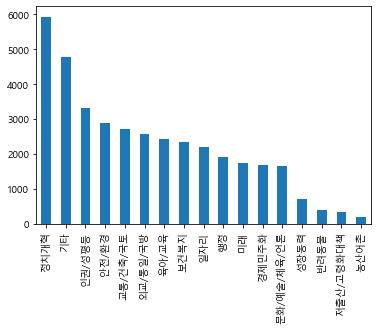

In [111]:
pet.category.value_counts().plot(kind='bar')
plt.show()

In [113]:
pet.sort_values('start', inplace=True)

In [ ]:
# 월별 등장빈도가 가장 많은 상위 5개 단어를 출력..

In [124]:
pet['mon'] = pet.start.dt.year.astype('str') + pet.start.dt.month.astype('str').apply(lambda x: x.zfill(2))

In [132]:
pet.to_csv('pet_sample.csv')

In [127]:
pet_by_mon = pet.groupby('mon')['content'].sum()

In [129]:
pet_by_mon[0]

'안녕하세요? 저는 부산예문여고 2학년에 재학 중인 학생입니다. 다름이 아니라 저희 학교에서 연구 과제 대회를 진행하고 있습니다. 저는 소방공무원의 업무실태 조사라는 주제를 연구를 진행하던 중에 소방서 3곳을 들러 소방공무원의 처우 개선이라는 주제로 설문조사를 실시했습니다. 설문조사 결과를 통계 내던 중 저는 충격에 빠졌습니다. 당연히 매스컴에서 보도되는 문제인 소방 장비의 부족이나 초과 근무 수당의 미지급이 큰 문제라고 생각하였는데 부족한 소방인원이 큰 문제라는 결과가 나왔습니다. 또한, 저희가 소방서 3곳을 방문했지만 생각보다 매우 적은 인원이 계셨습니다.  광역단체 소속의 소방서임에도 불구하고 적은 인원으로 업무 시에 어려운 점이 많고 광역단체가 아닌 다른 소규모의 지자체에서의 실정은 더하다고 들었습니다. 소규모 지자체 소속의 소방서는 인원이 한 소방서에 5명 내외이고 장비 또한 정말 부족하다고 합니다. 국가에서 각 가구마다 소화기 설치를 권장하시고 제도로 만들어 놓기까지 했으나 시골이나 외곽 지역은 소화기 설비가 잘 되어 있지도 않고 주로 노인 분들이 많으시기 때문에 소화기가 구비되어 있다 하더라도 거의 화재초기진압이 불가피합니다. 모든 소방서 뿐만 아니라 이런 외곽지역에 더 많은 지원과 인원이 필요한 것 아닐까요? 그래서 저는 소방공무원의 인원 충원과 국가직의 신속한 전환을 촉구합니다. 저희가 조사한 그래프에 따르면 2014년의 소방인력은 4만 5천명 미만이고 이중 현장 활동 인력은 약 3만 명입니다. 현행 소방력 기준에 관한 규칙은 소방서·소방기관별 근무요원의 배치 기준을 정해 놓았는데, 재난 현장의 최전방에서 근무하는 소방관의 업무가 과중해지는 것을 막기 위한 최소한의 기준입니다. 그런데 이 기준대로라면 현장 활동 인력은 최소 5만1천명을 넘어야 하는데 현원이 약 2만 명이나 부족하다는 것입니다. 이렇게 2만명이나 부족한 인원을 빨리 충원해야 소방관분들의 근무 환경도 개선이 되고 우리나라의 안전율 또한 증가할 수 있습니다. 또한 현재 소방관 눈물 

In [131]:
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
kom = Komoran()

ModuleNotFoundError: No module named '_jpype'